# Exercice 11 - Norme d'une matrice de Hankel infinie 

## 1. Calcul de la norme avec la methode de puissance

Generation d'une matrice de Hilbert de taille **"n*n"**:
-----------------------------------------

In [1]:
import numpy as np
def matrice_hilbert(n):
    M=np.zeros((n,n))##matrice nulle
    for i in range(n):
        for j in range(n):
            M[i,j]=1/(i+j+1)
    return M
print(matrice_hilbert(5))

[[1.         0.5        0.33333333 0.25       0.2       ]
 [0.5        0.33333333 0.25       0.2        0.16666667]
 [0.33333333 0.25       0.2        0.16666667 0.14285714]
 [0.25       0.2        0.16666667 0.14285714 0.125     ]
 [0.2        0.16666667 0.14285714 0.125      0.11111111]]


Norme d'une matrice **M** par methode de la puissance:
-----------------------------------------------------

In [50]:
import numpy as np
import time
from scipy.linalg import hilbert
def puissance_norme(M,i=10000,t=1e-10):
    n=M.shape[0] #taille de la matrice M
    x=np.random.rand(n) #x est le vecteur aleatoire initial
    x=x/np.linalg.norm(x)
    a=0
    for k in range(i):
        Mx=M@x
        x=Mx/np.linalg.norm(Mx)
        valeur_propre=x.T@M@x
        if abs(valeur_propre-a)<t:
            return valeur_propre,k+1
        a=valeur_propre
    
    return valeur_propre,i
Test=[]
for i in range(2001):
    k=i*10
    Test.append(k)
    
resultat=[]
for n in Test:
    H=hilbert(n)
    debut=time.time()
    norme,i=puissance_norme(H)
    fin=time.time()
    resultat.append({'N':n,'norme':norme,'iterations':i,'duree_de_calcul':fin-debut})
    print("N=",n,",",norme,",",i,",",fin-debut)


N= 0 , 0.0 , 1 , 0.00010442733764648438
N= 10 , 1.7519196702649993 , 9 , 0.0005815029144287109
N= 20 , 1.9071347204053581 , 10 , 0.00015735626220703125
N= 30 , 1.986492568607964 , 11 , 0.0001633167266845703
N= 40 , 2.038366835311982 , 11 , 0.00021266937255859375
N= 50 , 2.0762966831280014 , 12 , 0.0001838207244873047
N= 60 , 2.1058918359716094 , 12 , 0.00019216537475585938
N= 70 , 2.129987510896388 , 12 , 0.00020051002502441406
N= 80 , 2.1502045773150673 , 13 , 0.0002295970916748047
N= 90 , 2.1675515519372897 , 13 , 0.00023436546325683594
N= 100 , 2.1826960977506933 , 13 , 0.0002703666687011719
N= 110 , 2.196101728192837 , 13 , 0.00040435791015625
N= 120 , 2.2081025574016167 , 14 , 0.0003879070281982422
N= 130 , 2.218946887950508 , 14 , 0.0006740093231201172
N= 140 , 2.228823974794328 , 14 , 0.0007674694061279297
N= 150 , 2.2378811714978717 , 14 , 0.0005891323089599609
N= 160 , 2.2462353126360872 , 14 , 0.0005016326904296875
N= 170 , 2.253980501751866 , 14 , 0.0005443096160888672
N= 18

## 2. Methode d'Arnoldi



## Arnoldi
-------

In [6]:
from scipy.sparse.linalg import eigs
from scipy.linalg import hilbert
def arnoldi(n):
    H=hilbert(n)
    debut=time.time()
    if n<=2:
        return 1,1
    a=eigs(H,k=1,which='LM',return_eigenvectors=False)
    fin=time.time()
    return np.abs(a[0]),fin-debut

resultat2=[]
for n in Test:
    norme,d=arnoldi(n)
    resultat2.append({'N':n,'norme':norme,'duree_de_calcul':d})
    print("N=",n,",",norme,",",d)

N= 0 , 1 , 1
N= 10 , 1.7519196702651774 , 0.04682421684265137
N= 20 , 1.9071347204072544 , 0.0007154941558837891
N= 30 , 1.9864925686087398 , 0.0006759166717529297
N= 40 , 2.0383668353150224 , 0.0006554126739501953
N= 50 , 2.076296683131165 , 0.0006387233734130859
N= 60 , 2.105891835979768 , 0.0006756782531738281
N= 70 , 2.1299875109073305 , 0.0007045269012451172
N= 80 , 2.1502045773192355 , 0.0014562606811523438
N= 90 , 2.1675515519450204 , 0.0008859634399414062
N= 100 , 2.1826960977574283 , 0.0007798671722412109
N= 110 , 2.1961017282079567 , 0.0011737346649169922
N= 120 , 2.20810255740482 , 0.0010445117950439453
N= 130 , 2.218946887955687 , 0.0008449554443359375
N= 140 , 2.228823974801313 , 0.0011050701141357422
N= 150 , 2.23788117150694 , 0.0010743141174316406
N= 160 , 2.2462353126453323 , 0.0017306804656982422
N= 170 , 2.25398050177101 , 0.0010197162628173828
N= 180 , 2.261193580575599 , 0.00089263916015625
N= 190 , 2.267938057648095 , 0.0008769035339355469
N= 200 , 2.2742669874318

## Comparaison Methode puissance vs Arnoldi
----------------------------------------

In [52]:
print("N,rapport entre temps de calcul par methode vs Arnoldi")
ratio=[]
for i in range(2000):
    acceleration=resultat[i]['duree_de_calcul']/resultat2[i]['duree_de_calcul']
    print(i*10,",",acceleration)
    ratio.append(acceleration)

N,rapport entre temps de calcul par methode vs Arnoldi
0 , 0.00010442733764648438
10 , 0.012418849767051095
20 , 0.21992669110296567
30 , 0.24162257495590828
40 , 0.3244816296835213
50 , 0.2877939529675252
60 , 0.28440366972477066
70 , 0.2846023688663283
80 , 0.15766208251473476
90 , 0.26453175457481165
100 , 0.3466829715683277
110 , 0.34450538289660776
120 , 0.3713763980826295
130 , 0.797686230248307
140 , 0.6944983818770226
150 , 0.5483799378606302
160 , 0.2898470863755338
170 , 0.5337853635725976
180 , 0.6423611111111112
190 , 0.7591082109842305
200 , 0.8
210 , 0.572635814889336
220 , 0.342725843511912
230 , 0.34569024334773707
240 , 0.44900168390666345
250 , 0.39753933037515127
260 , 0.4512674825174825
270 , 1.1217853347502658
280 , 0.9235910002227667
290 , 1.0621490803484994
300 , 0.4397885994714987
310 , 0.5072604065827686
320 , 1.7013473053892216
330 , 2.1843238587424634
340 , 1.3562466866937621
350 , 0.8472451336192676
360 , 1.0466364011555922
370 , 2.084379975234389
380 , 0.50

## 3. Convergence

In [54]:
donnee= []
for i in range(200): 
    k=i*10# jusqu'à N = 2000
    N1 = i * 100
    N2 = N1 + 100
    norm1=resultat2[k]['norme']
    norm2=resultat2[k+10]['norme']
    diff = abs(norm1 - norm2)
    donnee.append({'N': N1,'diff': diff})
    print(f"  |‖A‖_{N1} - ‖A‖_{N2}| = {diff:.10f}")



  |‖A‖_0 - ‖A‖_100| = 1.1826960978
  |‖A‖_100 - ‖A‖_200| = 0.0915708897
  |‖A‖_200 - ‖A‖_300| = 0.0477529495
  |‖A‖_300 - ‖A‖_400| = 0.0315864948
  |‖A‖_400 - ‖A‖_500| = 0.0232900740
  |‖A‖_500 - ‖A‖_600| = 0.0182899648
  |‖A‖_600 - ‖A‖_700| = 0.0149692594
  |‖A‖_700 - ‖A‖_800| = 0.0126147795
  |‖A‖_800 - ‖A‖_900| = 0.0108646627
  |‖A‖_900 - ‖A‖_1000| = 0.0095164444
  |‖A‖_1000 - ‖A‖_1100| = 0.0084483248
  |‖A‖_1100 - ‖A‖_1200| = 0.0075828037
  |‖A‖_1200 - ‖A‖_1300| = 0.0068683106
  |‖A‖_1300 - ‖A‖_1400| = 0.0062692502
  |‖A‖_1400 - ‖A‖_1500| = 0.0057602934
  |‖A‖_1500 - ‖A‖_1600| = 0.0053229447
  |‖A‖_1600 - ‖A‖_1700| = 0.0049433959
  |‖A‖_1700 - ‖A‖_1800| = 0.0046111388
  |‖A‖_1800 - ‖A‖_1900| = 0.0043180403
  |‖A‖_1900 - ‖A‖_2000| = 0.0040577114
  |‖A‖_2000 - ‖A‖_2100| = 0.0038250666
  |‖A‖_2100 - ‖A‖_2200| = 0.0036160094
  |‖A‖_2200 - ‖A‖_2300| = 0.0034272047
  |‖A‖_2300 - ‖A‖_2400| = 0.0032559109
  |‖A‖_2400 - ‖A‖_2500| = 0.0030998543
  |‖A‖_2500 - ‖A‖_2600| = 0.0029571341
  |‖A‖_

## 4. calcul a haute precision

### matrice

In [99]:
import mpmath
def haut_hilbert_matrice(n,precision=100):
    mpmath.mp.dps=precision
    M=mpmath.matrix(n,n)
    for i in range(n):
        for j in range(n):
            M[i,j]=mpmath.mpf(1)/mpmath.mpf(i+j+1)
    return M
            
    

### calcul

In [12]:
valeurs=[]
for k in 
def haut_puissance_norme(M,t=1.e-50,i_max=1000):
    n=M.rows
    x=mpmath.matrix(n,1)
    for i in range(n):
        x[i]=mpmath.mpf(1)
    N_x=mpmath.sqrt(sum(x[i]**2 for i in range(n)))#norme de x
    for i in range(n):
        x[i]=x[i]/N_x
    a=mpmath.mpf(0)
    for k in range(i_max):
        Mx=M*x
        N_Mx=mpmath.sqrt(sum(Mx[i]**2 for i in range(n)))#norme de Mx
        for i in range(n):
            x[i]=Mx[i]/N_Mx
            valeur_propre=mpmath.fsum(x[i]*M[i,j]*x[j] for i in range(n) for j in range(n))
            if abs(valeuré_propre-a)<t:
                return valeur_propre,k+1
        a=valeur_propre
    return valeur_propre,i_max

#calcul
N=100
precision=100
M=haut_hilbert_matrice(100,100)
norm,i=haut_puissance_norme(M)
print(norm,i)
                         
        

2.182696097757423843047640591915644855005257960077854080310104503498785887413636647342506640382154354 60


## 5.Limite

/tmp/ipykernel_3088/235919605.py:10: RuntimeWarning: invalid value encountered in log
  return a+b*(np.log(N+c))


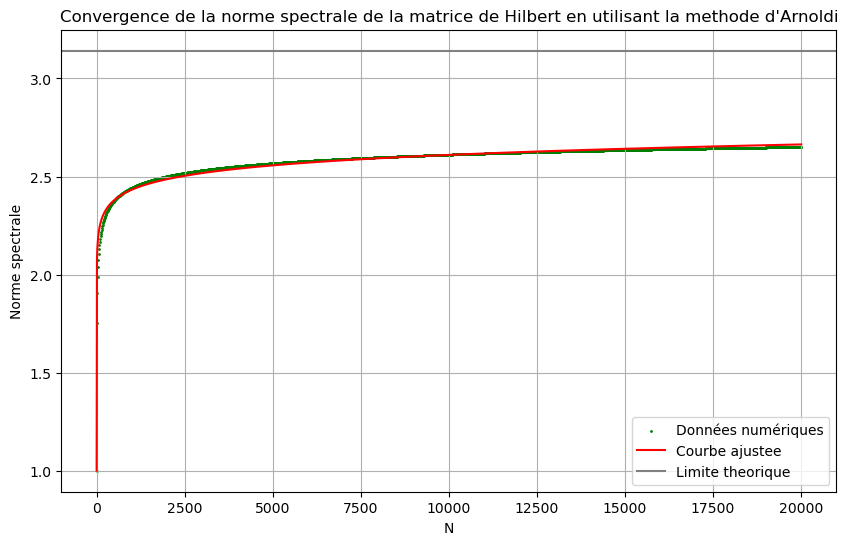

In [72]:
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

# importations des resultats
N_valeurs = np.array([result['N'] for result in resultat2])
Normes = np.array([result['norme'] for result in resultat2])

# modele logarithmique
def mod_log(N,a,b,c):
    return a+b*(np.log(N+c))
#ajustement utilisant le modele logarithmique
p0=[2.8,0.1,1]
parametres,_=curve_fit(mod_log,N_valeurs,Normes,p0=p0)

#Courbe ajustee
N_fine = np.linspace(min(N_valeurs), max(N_valeurs), 2000)

# Visualisation
plt.figure(figsize=(10, 6))
plt.scatter(N_valeurs, Normes, s=1, label="Données numériques",color='green')
plt.plot(N_fine,mod_log(N_fine,*parametres), '-',label="Courbe ajustee",color='red')
plt.axhline(y=np.pi,color='gray',label="Limite theorique")
plt.xlabel('N')
plt.ylabel('Norme spectrale')
plt.title('Convergence de la norme spectrale de la matrice de Hilbert en utilisant la methode d\'Arnoldi')
plt.legend()
plt.grid(True)
plt.savefig('fig1.png')
plt.show()

In [48]:
a,b,c=parametres
print(f"equation de la courbe ajustee est : y={a:.4f}+{b:.4f}*ln(N+{c:.8f})")

equation de la courbe ajustee est : y=1.9016+0.0770*ln(N+0.00000816)


/tmp/ipykernel_3088/1496218084.py:10: RuntimeWarning: divide by zero encountered in divide
  return a-b/(N**c)
/tmp/ipykernel_3088/1496218084.py:13: OptimizeWarning: Covariance of the parameters could not be estimated
  parametres,_=curve_fit(mod_log,N_valeurs,Normes,p0=p0)


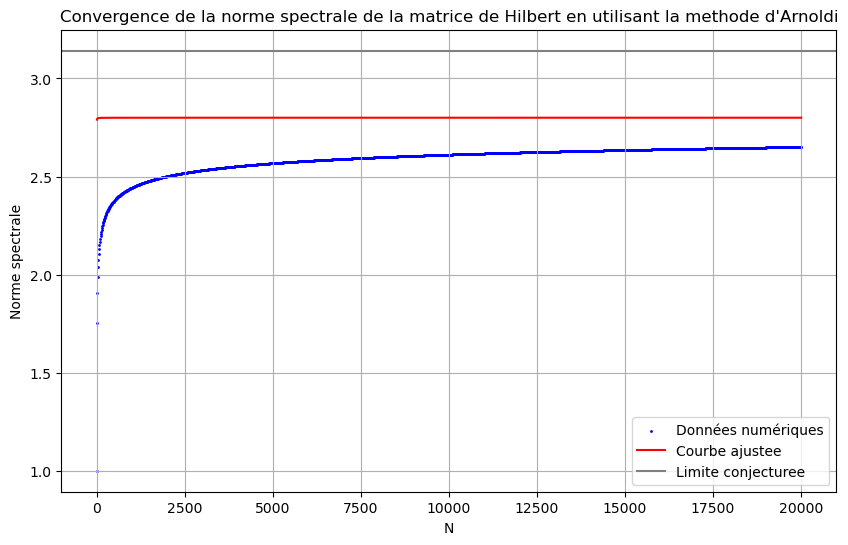

In [98]:
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

# importations des resultats
N_valeurs = np.array([result['N'] for result in resultat2])
Normes = np.array([result['norme'] for result in resultat2])

# modele asymptotique
def mod_log(N,a,b,c):
    return a-b/(N**c)
#ajustement utilisant le modele asymptotique
p0=[2.8,0.1,1]
parametres,_=curve_fit(mod_log,N_valeurs,Normes,p0=p0)

#Courbe ajustee
N_fine = np.linspace(min(N_valeurs), max(N_valeurs), 2000)

# Visualisation
plt.figure(figsize=(10, 6))
plt.scatter(N_valeurs, Normes, s=1, label="Données numériques",color='blue')
plt.plot(N_fine,mod_log(N_fine,*parametres), '-',label="Courbe ajustee",color='red')
plt.axhline(y=np.pi,color='gray',label="Limite theorique")
plt.xlabel('N')
plt.ylabel('Norme spectrale')
plt.title('Convergence de la norme spectrale de la matrice de Hilbert en utilisant la methode d\'Arnoldi')
plt.legend()
plt.grid(True)
plt.savefig('fig2.png')
plt.show()

In [68]:
a,b,c=parametres
print(f"equation de la courbe ajustee est : y={a:.4f}-{b:.4f}/(N**{c:.8f})")

equation de la courbe ajustee est : y=2.8000-0.1000/(N**1.00000000)


# Enregistrement des resultats

In [78]:
import csv


with open('methodePuissance.csv', 'w', newline='', encoding='utf-8') as f:
    writer = csv.writer(f)
    writer.writerow(["N", "Norme","iterations","durree"])
    for i,N in enumerate(Test):
      a,b,c=resultat[i]['norme'],resultat[i]['iterations'],resultat[i]['duree_de_calcul']
      writer.writerow([N,a,b,c])
    



In [84]:

import csv

with open('methodeArnoldi.csv', 'w', newline='', encoding='utf-8') as f:
    writer = csv.writer(f)
    writer.writerow(["N", "Norme","durree"])
    for i,N in enumerate(Test):
      a,b=resultat2[i]['norme'],resultat[i]['duree_de_calcul']
      writer.writerow([N,a,b])
    



In [90]:
import csv
with open('convergence.csv', 'w', newline='', encoding='utf-8') as f:
    writer = csv.writer(f)
    writer.writerow(["N", "valeurabsolue||A||N-||A||N+100"])
    for i in range(1,12):
      b=donnee[i-1]['diff']
      writer.writerow([100*i,b])

